# **1. Perkenalan Dataset**


Dataset: Wine Quality Dataset
Sumber: UCI Machine Learning Repository
Link: https://archive.ics.uci.edu/ml/datasets/wine+quality

Dataset ini berisi informasi tentang kualitas wine merah berdasarkan 
berbagai fitur kimia seperti acidity, sugar, pH, alcohol, dll.

Target: Memprediksi kualitas wine (quality score 0-10)
Jumlah sampel: 1599 samples
Jumlah fitur: 11 fitur numerik + 1 target

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Simpan sebagai raw data
df.to_csv('../data_raw/wine_quality_raw.csv', index=False)

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (1599, 12)

First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# CELL 4: EDA - Informasi Dasar
# ============================================================
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("\nStatistical Summary:")
print(df.describe())
print("\n" + "="*50)
print("\nMissing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("\nDuplicate Rows:", df.duplicated().sum())
print("\n" + "="*50)
print("\nTarget Distribution:")
print(df['quality'].value_counts().sort_index())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


Statistical Summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599

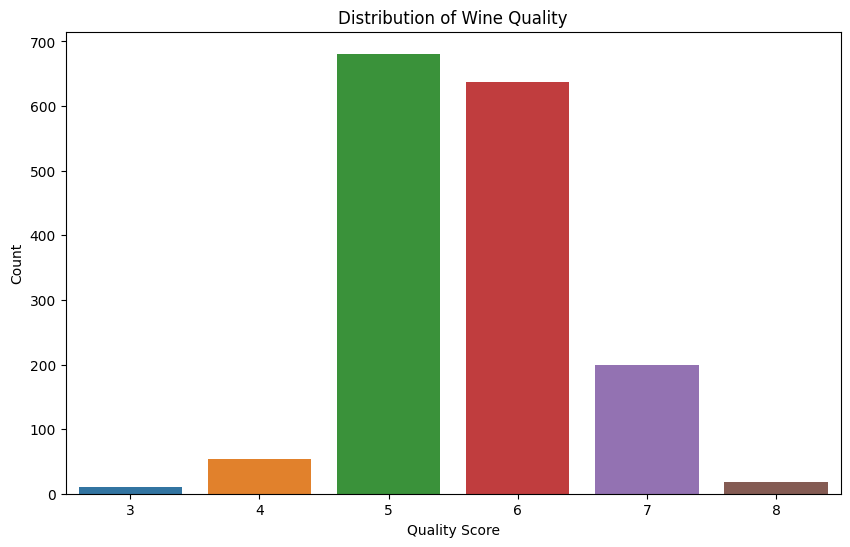

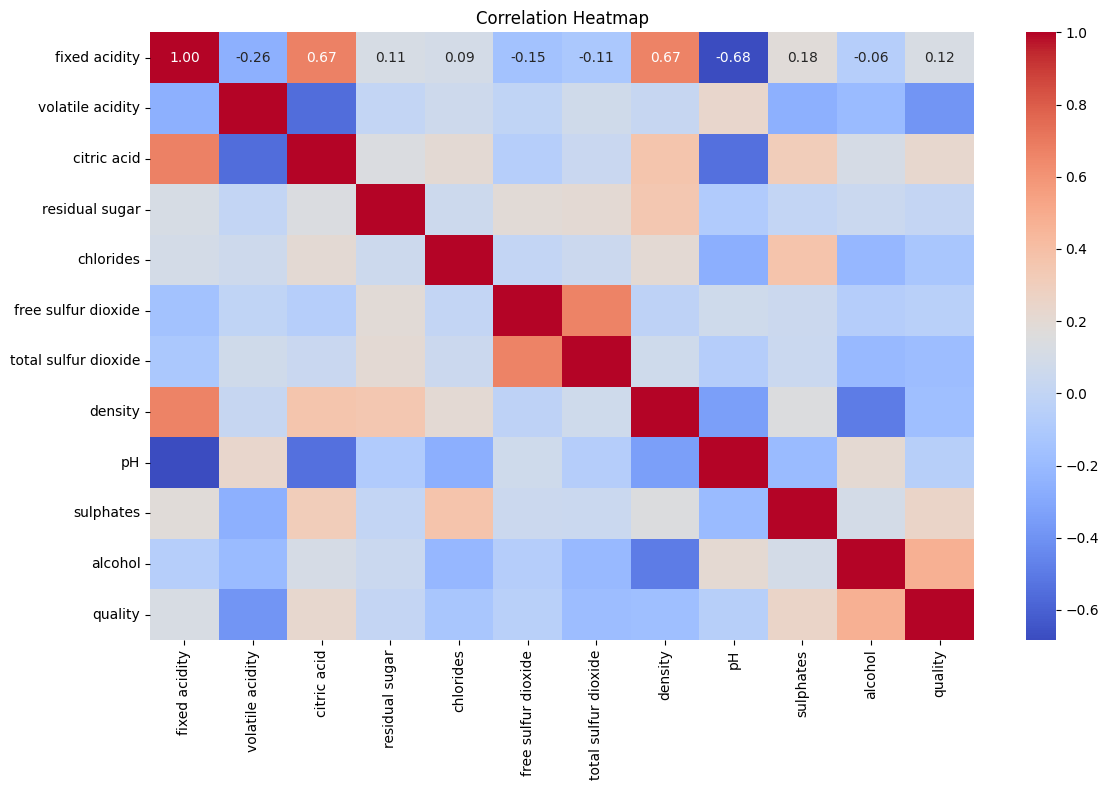

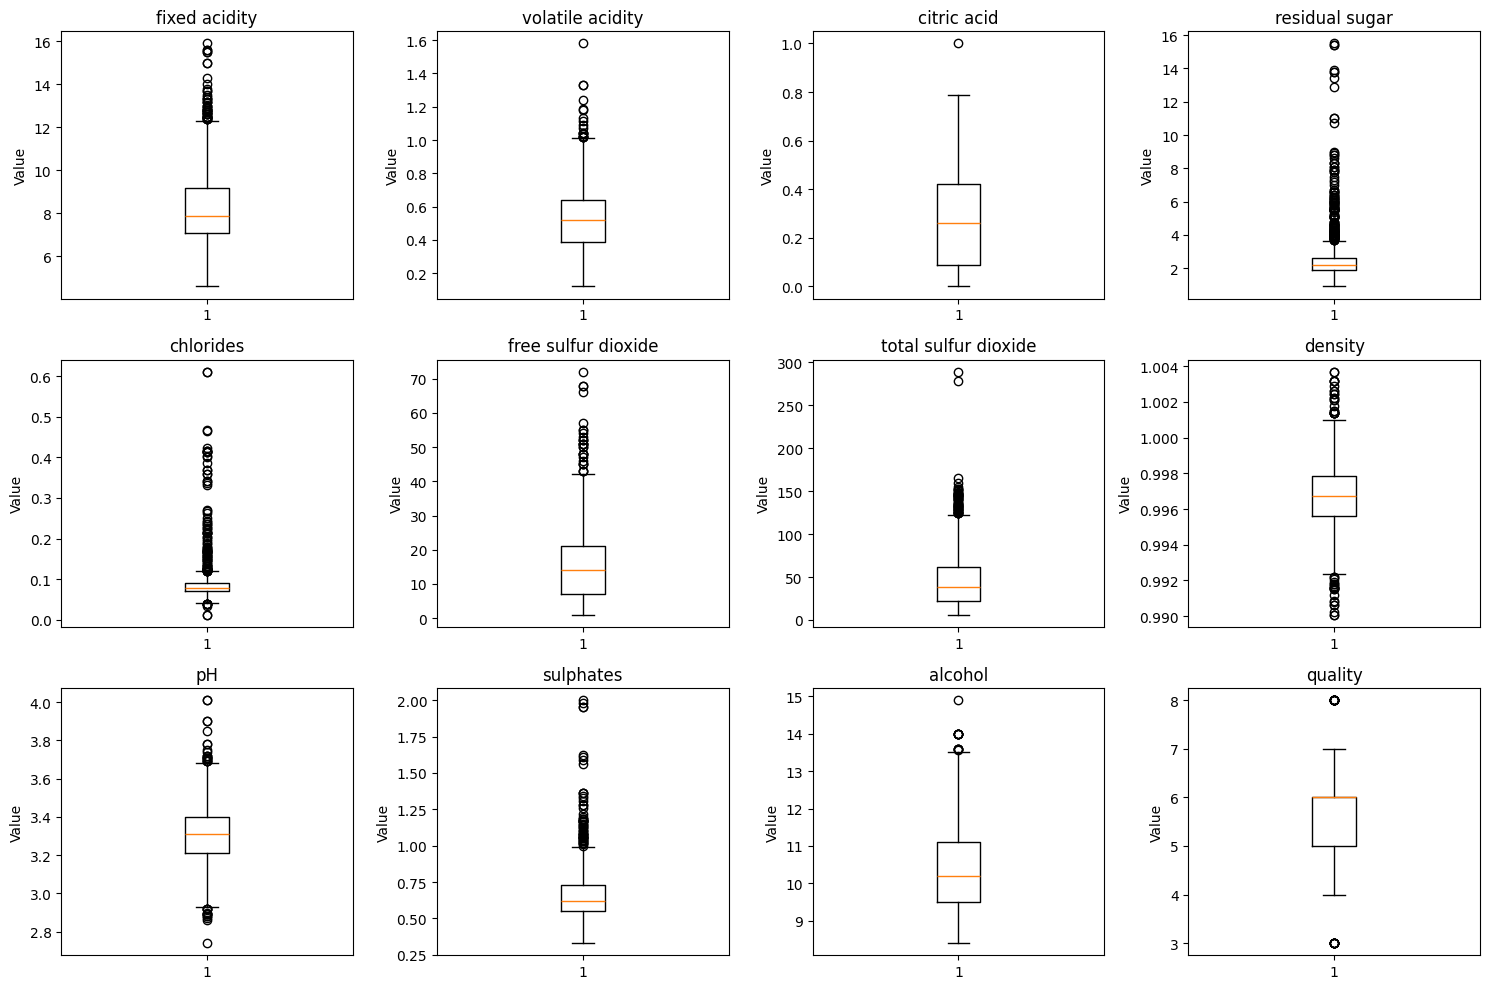

In [4]:
# CELL 5: EDA - Visualisasi
# ============================================================
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Box plots untuk outlier detection
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [5]:
# CELL 6: Data Preprocessing - Handle Missing Values
# ============================================================
print("Checking missing values before preprocessing:")
print(df.isnull().sum())

# Untuk dataset Wine Quality, tidak ada missing values
# Tapi kita tetap buat fungsi untuk handle jika ada
df_clean = df.copy()

# Jika ada missing values, uncomment ini:
# df_clean = df_clean.dropna()  # atau
# df_clean = df_clean.fillna(df_clean.mean())

print("\nMissing values after preprocessing:")
print(df_clean.isnull().sum())


Checking missing values before preprocessing:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Missing values after preprocessing:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [6]:
# CELL 7: Data Preprocessing - Handle Duplicates
# ============================================================
print(f"Duplicate rows before: {df_clean.duplicated().sum()}")
df_clean = df_clean.drop_duplicates()
print(f"Duplicate rows after: {df_clean.duplicated().sum()}")
print(f"Dataset shape after removing duplicates: {df_clean.shape}")

Duplicate rows before: 240
Duplicate rows after: 0
Dataset shape after removing duplicates: (1359, 12)


In [7]:
# CELL 8: Data Preprocessing - Handle Outliers (Optional)
# ============================================================
# Menggunakan IQR method untuk deteksi outlier
def remove_outliers_iqr(df, columns):
    df_no_outliers = df.copy()
    for col in columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers = df_no_outliers[
            (df_no_outliers[col] >= lower_bound) & 
            (df_no_outliers[col] <= upper_bound)
        ]
    return df_no_outliers

# Pilih kolom numerik kecuali target
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('quality')

print(f"Shape before outlier removal: {df_clean.shape}")
df_clean = remove_outliers_iqr(df_clean, numeric_cols)
print(f"Shape after outlier removal: {df_clean.shape}")

Shape before outlier removal: (1359, 12)
Shape after outlier removal: (985, 12)


In [8]:
# CELL 9: Data Preprocessing - Feature Engineering
# ============================================================
# Convert target menjadi binary classification (untuk mempermudah)
# Quality > 6 = Good (1), Quality <= 6 = Bad (0)
df_clean['quality_binary'] = (df_clean['quality'] > 6).astype(int)

print("Binary target distribution:")
print(df_clean['quality_binary'].value_counts())

# Drop original quality column
df_processed = df_clean.drop('quality', axis=1)


Binary target distribution:
quality_binary
0    860
1    125
Name: count, dtype: int64


In [9]:
# CELL 10: Data Preprocessing - Train-Test Split
# ============================================================
# Separate features and target
X = df_processed.drop('quality_binary', axis=1)
y = df_processed['quality_binary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nTraining set target distribution:\n{y_train.value_counts()}")
print(f"\nTest set target distribution:\n{y_test.value_counts()}")

Training set size: (788, 11)
Test set size: (197, 11)

Training set target distribution:
quality_binary
0    688
1    100
Name: count, dtype: int64

Test set target distribution:
quality_binary
0    172
1     25
Name: count, dtype: int64


In [10]:
# CELL 11: Data Preprocessing - Feature Scaling
# ============================================================
# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Scaling completed!")
print("\nScaled training data sample:")
print(X_train_scaled.head())

Scaling completed!

Scaled training data sample:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.858157          0.644666    -1.324933        0.460364  -0.161988   
1       1.253352         -1.212180     1.915195        0.014568  -0.095918   
2      -0.449478         -0.014214     0.853774        0.014568  -1.219101   
3       1.049012         -1.361925     0.853774       -1.545719  -0.360197   
4      -0.858157         -0.972587     0.015809        0.460364   1.291543   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.061784             -0.072966 -0.808629  0.119669  -0.897788   
1            -1.367983             -1.023994  1.811115 -0.949307   1.364192   
2            -0.299275             -0.825863 -1.109460 -0.491175   0.097483   
3            -0.061784             -0.786237 -0.595539 -1.407440  -1.078746   
4            -1.130492             -0.984367 -0.069084  0.654157  -0.264433   

    alc

In [11]:
# CELL 12: Save Preprocessed Data
# ============================================================
# Combine scaled features with target
train_data = X_train_scaled.copy()
train_data['quality_binary'] = y_train.values

test_data = X_test_scaled.copy()
test_data['quality_binary'] = y_test.values

# Save to CSV
train_data.to_csv('data_preprocessing/wine_train_processed.csv', index=False)
test_data.to_csv('data_preprocessing/wine_test_processed.csv', index=False)

print("Preprocessed data saved successfully!")
print(f"Training data: wine_train_processed.csv - Shape: {train_data.shape}")
print(f"Test data: wine_test_processed.csv - Shape: {test_data.shape}")

Preprocessed data saved successfully!
Training data: wine_train_processed.csv - Shape: (788, 12)
Test data: wine_test_processed.csv - Shape: (197, 12)


# **6. Quick Model Testing**

In [12]:
# Test model sederhana untuk memastikan data siap digunakan
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Model Performance (Quick Test):")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n" + "="*50)
print("PREPROCESSING COMPLETED SUCCESSFULLY!")
print("="*50)

Model Performance (Quick Test):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       172
           1       0.64      0.36      0.46        25

    accuracy                           0.89       197
   macro avg       0.78      0.67      0.70       197
weighted avg       0.88      0.89      0.88       197


Confusion Matrix:
[[167   5]
 [ 16   9]]

PREPROCESSING COMPLETED SUCCESSFULLY!
